# Funciones de pérdida

In [2]:
#import tensorflow as tf

# Para que funcione con la version 2 instalada
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt

In [3]:
session = tf.Session()

# Tipos de funciones de pérdidas en problemas de predicción (regresión)

In [4]:
x_vals = tf.linspace(-1., 1., 500) # 500 valores de -1 a 1
target = tf.constant(0.)
#print(session.run(x_vals))

## Norma en L2 (distancia Euclidea)
$$L2(y_r, y_p) = (y_r - y_p)^2 $$

In [5]:
l2_y_vals = tf.square(target-x_vals) # (Yr - Yp)^2

In [6]:
l2_y_out = session.run(l2_y_vals)

In [7]:
print(l2_y_out)

[1.00000000e+00 9.92000103e-01 9.84032154e-01 9.76096511e-01
 9.68192935e-01 9.60321426e-01 9.52482104e-01 9.44674969e-01
 9.36899841e-01 9.29156899e-01 9.21446025e-01 9.13767397e-01
 9.06120896e-01 8.98506403e-01 8.90924096e-01 8.83373976e-01
 8.75855863e-01 8.68369997e-01 8.60916257e-01 8.53494525e-01
 8.46105039e-01 8.38747680e-01 8.31422329e-01 8.24129224e-01
 8.16868246e-01 8.09639275e-01 8.02442551e-01 7.95277953e-01
 7.88145423e-01 7.81045079e-01 7.73976862e-01 7.66940653e-01
 7.59936750e-01 7.52964914e-01 7.46025085e-01 7.39117563e-01
 7.32241988e-01 7.25398719e-01 7.18587518e-01 7.11808383e-01
 7.05061436e-01 6.98346555e-01 6.91663861e-01 6.85013294e-01
 6.78394794e-01 6.71808541e-01 6.65254354e-01 6.58732235e-01
 6.52242362e-01 6.45784557e-01 6.39358819e-01 6.32965326e-01
 6.26603961e-01 6.20274603e-01 6.13977432e-01 6.07712448e-01
 6.01479471e-01 5.95278740e-01 5.89110136e-01 5.82973540e-01
 5.76869190e-01 5.70796967e-01 5.64756751e-01 5.58748782e-01
 5.52772939e-01 5.468291

In [8]:
# Puedo utilizar esta funcionalodad sin utilizar squared
tf.nn.l2_loss(target-x_vals)

<tf.Tensor 'L2Loss:0' shape=() dtype=float32>

## Norma en L1 (valor absoluto)
$$L1(y_r, y_p) = |y_r-y_p|$$

In [9]:
# Valor absoluto de (Yr - Yp), siempre va a dar positivo
# Mejor para los outliers, no es derivable -> puede pasar que haya algoritmos que no convergen
l1_y_vals = tf.abs(target-x_vals)

In [10]:
l1_y_out = session.run(l1_y_vals)

In [11]:
print(l1_y_out)

[1.         0.995992   0.99198395 0.98797596 0.98396796 0.9799599
 0.9759519  0.9719439  0.96793586 0.96392787 0.9599198  0.9559118
 0.9519038  0.94789577 0.94388777 0.9398798  0.9358717  0.9318637
 0.92785573 0.9238477  0.9198397  0.9158317  0.91182363 0.90781564
 0.90380764 0.8997996  0.8957916  0.8917836  0.88777554 0.88376755
 0.87975955 0.8757515  0.8717435  0.8677355  0.86372745 0.85971946
 0.8557114  0.8517034  0.8476954  0.84368736 0.83967936 0.8356713
 0.8316633  0.8276553  0.82364726 0.81963927 0.8156313  0.8116232
 0.8076152  0.8036072  0.7995992  0.7955912  0.7915832  0.7875751
 0.78356713 0.77955914 0.7755511  0.7715431  0.7675351  0.76352704
 0.75951904 0.75551105 0.751503   0.747495   0.743487   0.73947895
 0.73547095 0.73146296 0.7274549  0.72344685 0.7194389  0.71543086
 0.7114228  0.70741487 0.7034068  0.69939876 0.6953908  0.69138277
 0.6873747  0.6833667  0.6793587  0.67535067 0.6713427  0.6673347
 0.6633266  0.6593186  0.65531063 0.6513026  0.6472946  0.6432866
 0.

## Pseudo-Huber
$$PH(y_r,y_p) = \delta^2 \cdot \sqrt{1+\left(\frac{y_r-y_p}{\delta}\right)^2}-1, \delta >0$$

In [12]:
# Continua y derivable,
# trata tomar lo mejor de ambas 2, no sacrifica ourliers y converge de forma derivable
delta1 = tf.constant(0.25) # delta -> como debe ser aseptuada la convinacion para los outliers
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1.+tf.square((target-x_vals)/delta1))-1.)
phuber1_y_out = session.run(phuber1_y_vals)
print(phuber1_y_out)

[1.95194095e-01 1.94222122e-01 1.93250388e-01 1.92278922e-01
 1.91307634e-01 1.90336585e-01 1.89365774e-01 1.88395262e-01
 1.87424958e-01 1.86454892e-01 1.85485139e-01 1.84515625e-01
 1.83546349e-01 1.82577342e-01 1.81608602e-01 1.80640161e-01
 1.79671928e-01 1.78704023e-01 1.77736357e-01 1.76769003e-01
 1.75801963e-01 1.74835175e-01 1.73868656e-01 1.72902465e-01
 1.71936601e-01 1.70970991e-01 1.70005724e-01 1.69040769e-01
 1.68076113e-01 1.67111784e-01 1.66147754e-01 1.65184096e-01
 1.64220735e-01 1.63257748e-01 1.62295029e-01 1.61332756e-01
 1.60370767e-01 1.59409150e-01 1.58447891e-01 1.57486990e-01
 1.56526446e-01 1.55566275e-01 1.54606521e-01 1.53647125e-01
 1.52688131e-01 1.51729509e-01 1.50771290e-01 1.49813473e-01
 1.48856103e-01 1.47899121e-01 1.46942526e-01 1.45986423e-01
 1.45030722e-01 1.44075468e-01 1.43120602e-01 1.42166257e-01
 1.41212344e-01 1.40258908e-01 1.39305934e-01 1.38353407e-01
 1.37401402e-01 1.36449888e-01 1.35498852e-01 1.34548336e-01
 1.33598328e-01 1.326488

In [13]:
# valores mas acentuados y grandes a costa de crasificar mas los outliers,
# mientras el delta mas grande, mas sacrificara los outliers pero menos penalizara 
# la funcion de peridad los valores cercanos a los resultads
delta2 = tf.constant(5.0)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1.+tf.square((target-x_vals)/delta2))-1.)
phuber2_y_out = session.run(phuber2_y_vals)
print(phuber2_y_out)

[ 4.95094061e-01  4.91175056e-01  4.87267971e-01  4.83372808e-01
  4.79498506e-01  4.75633144e-01  4.71788645e-01  4.67956066e-01
  4.64141369e-01  4.60338593e-01  4.56553698e-01  4.52783704e-01
  4.49025631e-01  4.45285439e-01  4.41563129e-01  4.37852740e-01
  4.34154272e-01  4.30479646e-01  4.26813960e-01  4.23166156e-01
  4.19533253e-01  4.15912271e-01  4.12309170e-01  4.08723950e-01
  4.05153632e-01  4.01592255e-01  3.98051739e-01  3.94526124e-01
  3.91015410e-01  3.87516618e-01  3.84038687e-01  3.80575657e-01
  3.77121568e-01  3.73688340e-01  3.70270014e-01  3.66866589e-01
  3.63478065e-01  3.60104442e-01  3.56748700e-01  3.53404880e-01
  3.50078940e-01  3.46767902e-01  3.43471766e-01  3.40190530e-01
  3.36927176e-01  3.33675742e-01  3.30445170e-01  3.27223539e-01
  3.24022770e-01  3.20833921e-01  3.17659974e-01  3.14503908e-01
  3.11362743e-01  3.08236480e-01  3.05125117e-01  3.02028656e-01
  2.98953056e-01  2.95889378e-01  2.92837620e-01  2.89803743e-01
  2.86787748e-01  2.83789

# Tipos de funciones de pérdidas para problemas de clasificación

In [14]:
# Una distribucion de 500 valores entre -3 y 5
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.0) # Valor valido de la prediccion
targets = tf.fill([500, ], 1.) # Valor valido de la prediccion

# Hinge (función bisagra)
$$H(y_r, y_p) = max(0, 1-y_r\cdot y_p)$$

In [15]:
# Muy utilizada en SVM, perdida entre los 2 target (clasificaciones)
# Que tan cerca del numero uno esta mi prediccion
hinge_y_vals = tf.maximum(0., 1.0 - tf.multiply(target, x_vals))
hinge_y_out = session.run(hinge_y_vals)
print(hinge_y_out) # Evalua como de lejos ha quedado el resultado
# Hay varios valores que son cero, porque se aleja tanto que pone ese valor

[4.         3.983968   3.9679358  3.9519038  3.9358718  3.9198396
 3.9038076  3.8877757  3.8717434  3.8557115  3.8396792  3.8236473
 3.8076153  3.791583   3.775551   3.759519   3.743487   3.727455
 3.711423   3.6953907  3.6793587  3.6633267  3.6472945  3.6312625
 3.6152306  3.5991983  3.5831664  3.5671344  3.5511022  3.5350702
 3.5190382  3.503006   3.486974   3.470942   3.4549098  3.4388778
 3.4228456  3.4068136  3.3907816  3.3747494  3.3587174  3.3426852
 3.3266532  3.3106213  3.294589   3.278557   3.262525   3.2464929
 3.230461   3.214429   3.1983967  3.1823647  3.1663327  3.1503005
 3.1342685  3.1182365  3.1022043  3.0861723  3.0701404  3.0541081
 3.0380762  3.0220442  3.006012   2.98998    2.973948   2.9579158
 2.9418838  2.9258518  2.9098196  2.8937874  2.8777556  2.8617234
 2.8456912  2.8296595  2.8136272  2.797595   2.7815633  2.765531
 2.7494988  2.7334669  2.717435   2.7014027  2.6853707  2.6693387
 2.6533065  2.6372745  2.6212425  2.6052103  2.5891783  2.5731463
 2.5571141  

## Entropía cruzada (función logística)
$$H(y_r, y_p) = -y_r\cdot log(y_p) - (1-y_r)\cdot log(1-y_p) $$

In [16]:
# Clasificacion binaria, predecir 2 clases binarias, si pertenece a 0 o pertenece a 1
# Me da infinito si la prediccion es completamente correcta
# Yr -> Real, Yp -> Prediccion
# La funcin no esta acotada, me devuelve muchos valores en nan por ser negativo
xentr_y_vals = -tf.multiply(target, tf.log(x_vals))-tf.multiply((1.-target), tf.log(1.-x_vals))
xentr_y_out = session.run(xentr_y_vals)
print(xentr_y_out)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

## Entropía cruzada de Sigmoide
$$H(y_r, y_p) = -y_r\cdot log\left(\frac{1}{1+e^{-y_p}}\right) - (1-y_r)\cdot log\left(1-\frac{1}{1+e^{-y_p}}\right) $$

In [17]:
# las funciones de valor x se llevan a cabo con sigmoides antes de usarlas en la entropia cruzada
# esta funcion ya la trae TF
# targets -> necesito tantas predicciones como valores que ingresan
xentr_sig_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentr_sig_y_out = session.run(xentr_sig_y_vals)
print(xentr_sig_y_out)

[3.0485873  3.0333216  3.0180674  3.0028253  2.9875953  2.9723773
 2.9571722  2.9419796  2.9267998  2.9116333  2.8964796  2.8813396
 2.866213   2.8511002  2.8360016  2.8209174  2.805847   2.7907915
 2.7757509  2.7607253  2.7457147  2.7307198  2.7157404  2.700777
 2.6858296  2.6708984  2.6559842  2.6410863  2.6262057  2.6113422
 2.5964963  2.581668   2.5668578  2.5520658  2.5372922  2.5225375
 2.5078013  2.493085   2.4783878  2.4637103  2.4490528  2.4344156
 2.419799   2.4052036  2.3906288  2.3760755  2.3615441  2.3470345
 2.332547   2.3180823  2.3036401  2.2892213  2.2748258  2.2604537
 2.246106   2.2317827  2.2174835  2.2032096  2.188961   2.174738
 2.1605408  2.14637    2.1322253  2.1181078  2.1040173  2.0899544
 2.0759194  2.0619125  2.0479343  2.0339847  2.0200646  2.006174
 1.9923133  1.978483   1.964683   1.9509143  1.9371768  1.9234711
 1.9097973  1.8961561  1.8825476  1.8689723  1.8554305  1.8419226
 1.828449   1.8150101  1.8016063  1.7882378  1.7749051  1.7616086
 1.7483487  1

In [18]:
# Funcion poderada, se puede ponderar con un peso uno u otra categoria
# De esta manera el target positivo queda ponderado
# Con la ponderacion me baja (si es menor a 1) o me sube (si es mayor a uno) el valor final
pos_weight = tf.constant(.5)
xentr_sig_w_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals, targets=targets, pos_weight=pos_weight)
xentr_sig_w_y_out = session.run(xentr_sig_w_y_vals)
print(xentr_sig_w_y_out)

Instructions for updating:
targets is deprecated, use labels instead
[1.5242937  1.5166608  1.5090337  1.5014126  1.4937977  1.4861887
 1.4785861  1.4709898  1.4633999  1.4558166  1.4482398  1.4406698
 1.4331065  1.4255501  1.4180008  1.4104587  1.4029235  1.3953958
 1.3878754  1.3803626  1.3728573  1.3653599  1.3578702  1.3503885
 1.3429148  1.3354492  1.3279921  1.3205432  1.3131028  1.3056711
 1.2982482  1.290834   1.2834289  1.2760329  1.2686461  1.2612687
 1.2539006  1.2465425  1.2391939  1.2318552  1.2245264  1.2172078
 1.2098995  1.2026018  1.1953144  1.1880378  1.1807721  1.1735172
 1.1662735  1.1590412  1.1518201  1.1446106  1.1374129  1.1302269
 1.123053   1.1158913  1.1087418  1.1016048  1.0944805  1.087369
 1.0802704  1.073185   1.0661126  1.0590539  1.0520086  1.0449772
 1.0379597  1.0309563  1.0239671  1.0169923  1.0100323  1.003087
 0.99615663 0.9892415  0.9823415  0.97545713 0.9685884  0.96173555
 0.95489866 0.94807804 0.9412738  0.93448615 0.92771524 0.9209613
 0.91422

## Softmax Cross Entroy
$$SM(z_k)=\frac{e^{z_k}}{\sum_{i=1}^n e^{z_i}}$$

In [24]:
# Valores que no estan normalizados
unscaled_logits = tf.constant([[1., -3., 10.]]) # posibles categorias
target_dist = tf.constant([[0.1, 0.02, 0.88]]) # probabilidades de ser predecidas, la de 88% tiene mas posibilidad
softmax_xentr = tf.nn.softmax_cross_entropy_with_logits_v2(logits=unscaled_logits, labels=target_dist)
softmax_xentr_y_out = session.run(softmax_xentr)
print(softmax_xentr_y_out) # Me mostrara la diferencia

[1.1601256]


## Sparse softmax cross entropy

In [30]:
unscaled_logits = tf.constant([[1., -3., 10.]]) # posibles categorias
# el indice con la posicion del valor con mas posibilidades de ser predecida, en este caso la que tenia %88
sparsed_target_dist = tf.constant([2]) 
sparsed_xentr = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparsed_target_dist)
sparsed_xentr_y_out = session.run(sparsed_xentr)
print(sparsed_xentr_y_out)

[0.00012564]


# Evaluar las funciones de pérdidas
### Función de pérdida para predicción

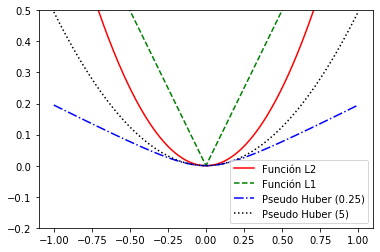

In [31]:
# El valor a predecir es donde se intersectan todas las lineas,
# Vemos como se comportan cuando se alejan del valor esperado
# penalizacon eje Y [0, 0.5]
# valores eje X [-1, 1]
x_vals = tf.linspace(-1., 1., 500)
x_array = session.run(x_vals)
plt.plot(x_array, l2_y_out, 'r-', label = "Función L2")
plt.plot(x_array, l1_y_out, 'g--', label = "Función L1")
plt.plot(x_array, phuber1_y_out, 'b-.', label = "Pseudo Huber (0.25)")
plt.plot(x_array, phuber2_y_out, 'k:', label = "Pseudo Huber (5)")
plt.ylim(-0.2, 0.5)
plt.legend(loc='lower right', prop={'size':10})
plt.show()

## Función de pérdida para clasificación

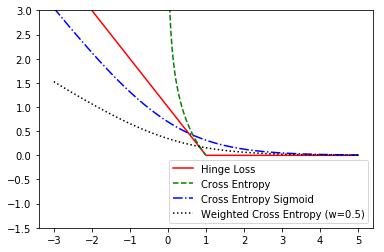

In [33]:
x_vals = tf.linspace(-3., 5., 500)
x_array = session.run(x_vals)
plt.plot(x_array, hinge_y_out, 'r-', label = "Hinge Loss")
plt.plot(x_array, xentr_y_out, 'g--', label = "Cross Entropy")
plt.plot(x_array, xentr_sig_y_out, 'b-.', label = "Cross Entropy Sigmoid")
plt.plot(x_array, xentr_sig_w_y_out, 'k:', label = "Weighted Cross Entropy (w=0.5)")
plt.ylim(-1.5, 3)
plt.legend(loc = "lower right", prop={'size':10})
plt.show()